# Mini Project 1 10 January 2022

The purpose of the Mini Project is to reinforce skills that have been covered in recent modules. 

Choose a business problem and translate it into a data science problem. Select a data set and analyse it using the techniques learned in recent modules. The techniques include (but not limited to) the following: Data Wrangling, Feature Engineering, EDA..

Prepare and present a 8-minute Powerpoint presentation for stakeholders and a 5 min Jupyter Notebook for technical discussion in class.

Presentation to be held on 9 Jan 2023 (Mon).

-----------

Rubric:
-Explanation of the business context behind the dataset
-Quality of presentation - engaging, well structured, not too short or too long
-Quality of the notebook - code well documented, runs correctly
-Time-management - please keep strictly to the time given

## Title of Project: E-Commerce Shipping Company

## Business problem

### How to increase on customer rating?


E-Commerce Shipping Data from kaggel.

Link https://www.kaggle.com/code/niteshyadav3103/eda-e-commerce-shipping-data

### Data Description- E-Commerce Shipping Data

- ID: ID Number of Customers.
- Warehouse block:- The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:-The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls:- The number of calls made from enquiry for enquiry of the shipment.
- Customer rating:- The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product-: Cost of the Product in US Dollars.
- Prior purchases:- The Number of Prior Purchase.
- Product importance:- The company has categorized the product in the various parameter such as low, medium, high.
- Gender:- Male and Female.
- Discount offered:- Discount offered on that specific product.
- Weight in gms:- It is the weight in grams.
- Reached on time:- It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

### Download Libraries

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns



### Data profiling

### Import CSV file

In [162]:
# importing csv data
data = pd.read_csv(r"C:\Users\jolen\IOD-Fulltime_5_Dec_2022\Mini Projects\Mini Project 1\DATA\e-commerce shipping data.csv", low_memory=False)

### View data

In [163]:
# Check data head
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of the_Product,Prior purchases,Product_importance,GENDER,Discount_offered,Weight_in_gms,Reached on Time_Y.N
0,1,D,Flight,4.0,2,177,3,low,F,44,1233,1
1,2,F,Flight,4.0,5,216,2,low,M,59,3088,1
2,3,A,Flight,2.0,2,183,4,low,M,48,3374,1
3,4,B,Flight,3.0,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2.0,2,184,3,medium,F,46,2484,1


In [164]:
# Check data tail
data.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of the_Product,Prior purchases,Product_importance,GENDER,Discount_offered,Weight_in_gms,Reached on Time_Y.N
10994,10995,A,Ship,4.0,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4.0,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5.0,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5.0,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2.0,5,155,5,low,F,6,1639,0


In [165]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10999 non-null  int64  
 1   Warehouse_block        10999 non-null  object 
 2   Mode_of_Shipment       10999 non-null  object 
 3    Customer_care_calls   10983 non-null  float64
 4   Customer_rating        10999 non-null  int64  
 5    Cost_of the_Product   10999 non-null  int64  
 6   Prior purchases        10999 non-null  int64  
 7   Product_importance     10999 non-null  object 
 8   GENDER                 10999 non-null  object 
 9   Discount_offered       10999 non-null  int64  
 10  Weight_in_gms          10999 non-null  int64  
 11  Reached on Time_Y.N    10999 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.0+ MB


In [166]:
# Check data describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10983.0,4.054994,1.141460,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached on Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [167]:
# Check data shape
data.shape

(10999, 12)

## Data Wrangling

### Check column names in order

In [168]:
# Check data columns
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', ' Customer_care_calls',
       'Customer_rating', ' Cost_of the_Product ', 'Prior purchases',
       'Product_importance', 'GENDER', 'Discount_offered', 'Weight_in_gms',
       'Reached on Time_Y.N'],
      dtype='object')

In [169]:
# Clean column names
# Actions: align the white spaces, lower the alphabets, all btween spaces replace with underscore

def clean_column_name(column_names):
    clean_column_names = []
    for c in column_names:
        c = c.strip()
        c = c.lower().replace(' ', '_')
        clean_column_names.append(c)
        
    return clean_column_names 

data.columns = clean_column_name(data)
data

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y.n
0,1,D,Flight,4.0,2,177,3,low,F,44,1233,1
1,2,F,Flight,4.0,5,216,2,low,M,59,3088,1
2,3,A,Flight,2.0,2,183,4,low,M,48,3374,1
3,4,B,Flight,3.0,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2.0,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4.0,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4.0,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5.0,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5.0,2,223,6,medium,M,2,1210,0


### Check columns relevent to use

In [170]:
# set id as index
data.set_index("id", inplace = True)

In [171]:
# check id have been set as index
data[0:1]

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y.n
id,,,,,,,,,,,
1,D,Flight,4.0,2,177,3,low,F,44,1233,1


### Check Null Values

In [172]:
# Check total sum of null values
data.isnull().sum().sum()

16

In [173]:
# Check total sum of null values in each columns
data.isnull().sum()

warehouse_block         0
mode_of_shipment        0
customer_care_calls    16
customer_rating         0
cost_of_the_product     0
prior_purchases         0
product_importance      0
gender                  0
discount_offered        0
weight_in_gms           0
reached_on_time_y.n     0
dtype: int64

In [174]:
# Checking rows where null values are in customer_care_calls
data[data['customer_care_calls'].isnull()]

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y.n
id,,,,,,,,,,,
78,F,Ship,NaN,3,113,3,low,F,43,1518,1
79,D,Ship,NaN,4,223,3,low,M,18,3959,1
80,F,Ship,NaN,5,257,2,medium,F,56,3711,1
81,A,Ship,NaN,4,180,2,medium,F,49,1942,1
82,B,Ship,NaN,5,132,3,low,M,18,1759,1
83,C,Ship,NaN,4,217,3,high,F,26,2875,1
84,F,Ship,NaN,5,162,3,high,F,31,1364,1
85,D,Ship,NaN,5,197,2,medium,F,40,2710,1
86,F,Ship,NaN,4,197,3,medium,M,13,2148,1


In [175]:
# replace null with average calls

data['customer_care_calls'].fillna(data['customer_care_calls'].mean(), inplace = True)

In [176]:
# Double check any more null values
data[data['customer_care_calls'].isnull()]

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y.n
id,,,,,,,,,,,


### Check data if it is required to change data types

In [177]:
# Check customer_care_calls dtypes
data.dtypes

warehouse_block         object
mode_of_shipment        object
customer_care_calls    float64
customer_rating          int64
cost_of_the_product      int64
prior_purchases          int64
product_importance      object
gender                  object
discount_offered         int64
weight_in_gms            int64
reached_on_time_y.n      int64
dtype: object

In [178]:
# Change customer_care_calls from float to interger (Number of calls)

data['customer_care_calls'] = data['customer_care_calls'].apply(int)

In [179]:
# Add new column for gender to 
# male 0
# female 1


data['gender_r'] = data['gender']
data['gender_r'].replace('M',0, inplace =True)
data['gender_r'].replace('F',1, inplace =True)

In [180]:
# Add new column and replace feature values with scale for product_importance

data['product_importance_r'] = data['product_importance']

scale_mapper = {"low":1, "medium":2, "high":3}

data['product_importance_r'].replace(scale_mapper, inplace = True)

In [181]:
# Add new column and replace feature values with scale for on time delivery
# Replace 1 with no
# Replace 0 with yes


data['reached_on_time_y.n_r'] = data['reached_on_time_y.n']

scale_mapper = {1:"no", 0:"yes"}

data['reached_on_time_y.n_r'].replace(scale_mapper, inplace = True)

In [182]:
# Check dtypes correctly reflected
data.dtypes

warehouse_block          object
mode_of_shipment         object
customer_care_calls       int64
customer_rating           int64
cost_of_the_product       int64
prior_purchases           int64
product_importance       object
gender                   object
discount_offered          int64
weight_in_gms             int64
reached_on_time_y.n       int64
gender_r                  int64
product_importance_r      int64
reached_on_time_y.n_r    object
dtype: object

In [183]:
#Check the number of unique values for each column
data.nunique()

warehouse_block             5
mode_of_shipment            3
customer_care_calls         6
customer_rating             5
cost_of_the_product       215
prior_purchases             8
product_importance          3
gender                      2
discount_offered           65
weight_in_gms            4034
reached_on_time_y.n         2
gender_r                    2
product_importance_r        3
reached_on_time_y.n_r       2
dtype: int64

### Check Min, Max of Each Column

In [184]:
def check_min_max(df):
    # Check min, max of each column
    print(df.describe().T[['min', 'max']])

In [185]:
check_min_max(data)

                         min     max
customer_care_calls      2.0     7.0
customer_rating          1.0     5.0
cost_of_the_product     96.0   310.0
prior_purchases          2.0    10.0
discount_offered         1.0    65.0
weight_in_gms         1001.0  7846.0
reached_on_time_y.n      0.0     1.0
gender_r                 0.0     1.0
product_importance_r     1.0     3.0


In [186]:
data.dtypes

warehouse_block          object
mode_of_shipment         object
customer_care_calls       int64
customer_rating           int64
cost_of_the_product       int64
prior_purchases           int64
product_importance       object
gender                   object
discount_offered          int64
weight_in_gms             int64
reached_on_time_y.n       int64
gender_r                  int64
product_importance_r      int64
reached_on_time_y.n_r    object
dtype: object

In [187]:
data.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y.n,gender_r,product_importance_r,reached_on_time_y.n_r
id,,,,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1,1,1,no
2,F,Flight,4,5,216,2,low,M,59,3088,1,0,1,no
3,A,Flight,2,2,183,4,low,M,48,3374,1,0,1,no
4,B,Flight,3,3,176,4,medium,M,10,1177,1,0,2,no
5,C,Flight,2,2,184,3,medium,F,46,2484,1,1,2,no


### Analyzing the data 

### Pie charts for all columns with value_counts - Demographics 

In [188]:
# Create a function for repeated value_counts
def value_count_columns(column):
    a = data[column].value_counts().reset_index()
    return a

In [189]:
# value_count for warehouse_block
warehse = value_count_columns('warehouse_block')
warehse.sort_values(by=['index'], axis = 0)

,index,warehouse_block
2,A,1833
3,B,1833
4,C,1833
1,D,1834
0,F,3666


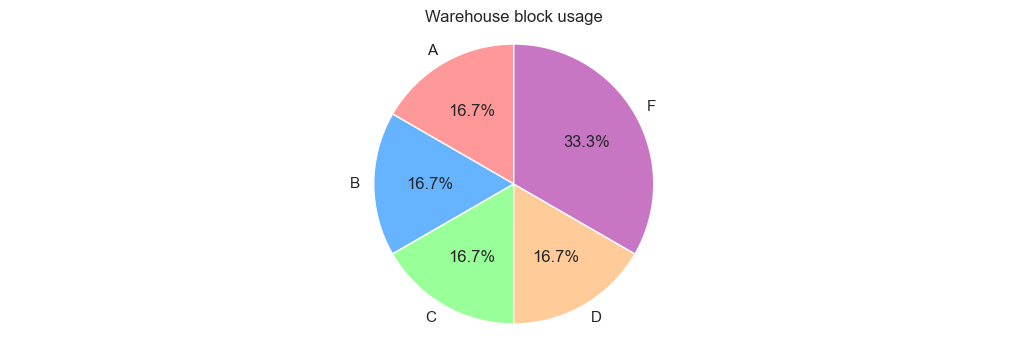

In [190]:
# Pie chart showing the value count for each warehouse_block
labels = 'A', 'B', 'C','D', 'F' 
frequency = [1833, 1833, 1833,1834,3666]
fig1, ax1 = plt.subplots()
explode = (0, 0, 0,0,0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#C875C4']
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Warehouse block usage')
plt.savefig('Warehouse block usage.png', facecolor='w', dpi=300)
plt.show()

# Findings
# Block F is the most common and frequent warehouse use

In [191]:
# value_count for mode_of_shipment
shipment = value_count_columns('mode_of_shipment')
shipment

,index,mode_of_shipment
0,Ship,7462
1,Flight,1777
2,Road,1760


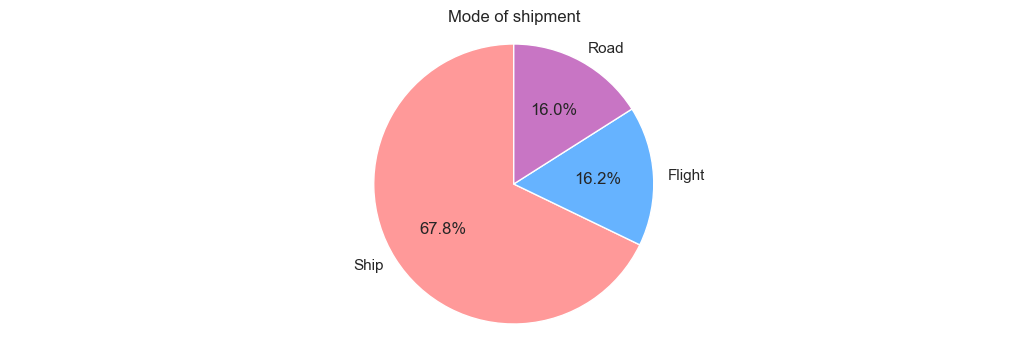

In [192]:
# Pie chart showing the value count for each shipment method
labels = 'Ship', 'Flight', 'Road'
frequency = [7462, 1777, 1760]
fig1, ax1 = plt.subplots()
explode = (0, 0, 0)  
colors = ['#ff9999','#66b3ff', '#C875C4']
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Mode of shipment')
plt.savefig('Mode of shipment.png', facecolor='w', dpi=300)
plt.show()

# Findings
# Shipping is the most common and frequent mode of shipment

In [193]:
# value_count for product_importance
p_impt = value_count_columns('product_importance')
p_impt

,index,product_importance
0,low,5297
1,medium,4754
2,high,948


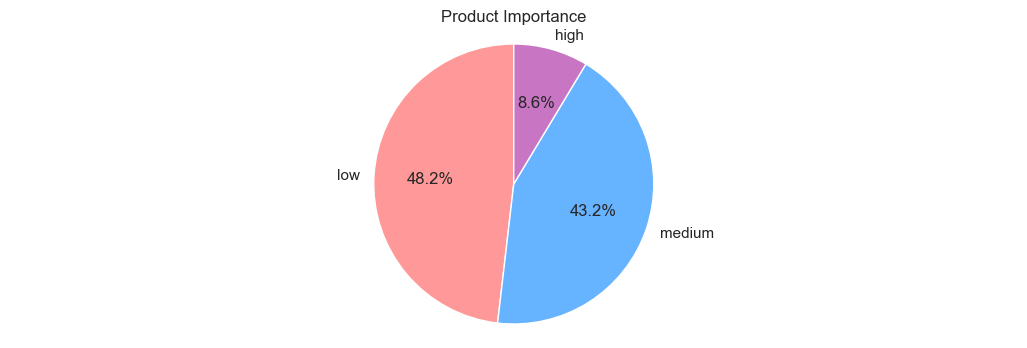

In [194]:
# Pie chart showing the value count for each product_importance
labels = 'low', 'medium', 'high'
frequency = [5297, 4754, 948]
fig1, ax1 = plt.subplots()
explode = (0, 0, 0)
colors = ['#ff9999','#66b3ff', '#C875C4']
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Product Importance')
plt.savefig('Product Importance', facecolor='w', dpi=300)
plt.show()

# Findings
# Product importance has the least for high ratings

In [195]:
# value_count for gender
gender_count = value_count_columns('gender')
gender_count.sort_values(by=['index'], axis = 0)

,index,gender
0,F,5545
1,M,5454


In [196]:
# value_count for gender
gender_count = value_count_columns('gender')
gender_count.sort_values(by=['index'], axis = 0)

,index,gender
0,F,5545
1,M,5454


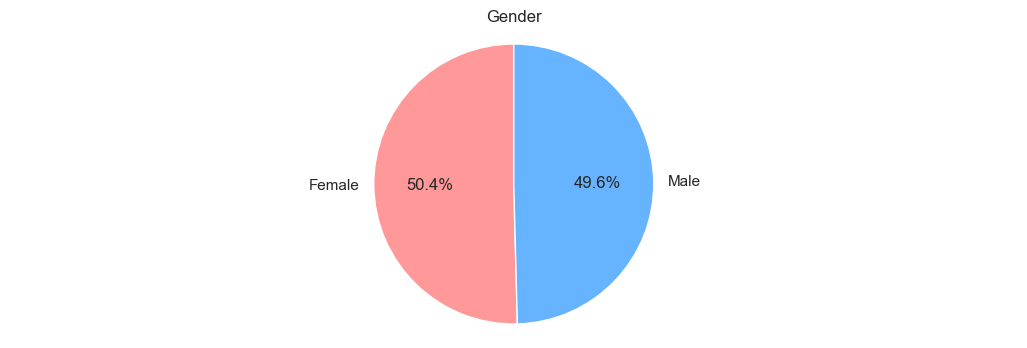

In [197]:
# Pie chart showing the value count for each gender
labels = 'Female', 'Male'
frequency = [5545, 5454]
fig1, ax1 = plt.subplots()
explode = (0, 0)
colors = ['#ff9999','#66b3ff']
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender')
plt.savefig('Gender', facecolor='w', dpi=300)
plt.show()

# Findings
# Reflects an almost evenly distributed for gender column with male slighly lesser

In [198]:
# value_count for gender reached_on_time_y.n 
# 1 = No on time
# 2 = On time
on_time_count = value_count_columns('reached_on_time_y.n')
on_time_count.sort_values(by=['index'], axis = 0)

,index,reached_on_time_y.n
1,0,4436
0,1,6563


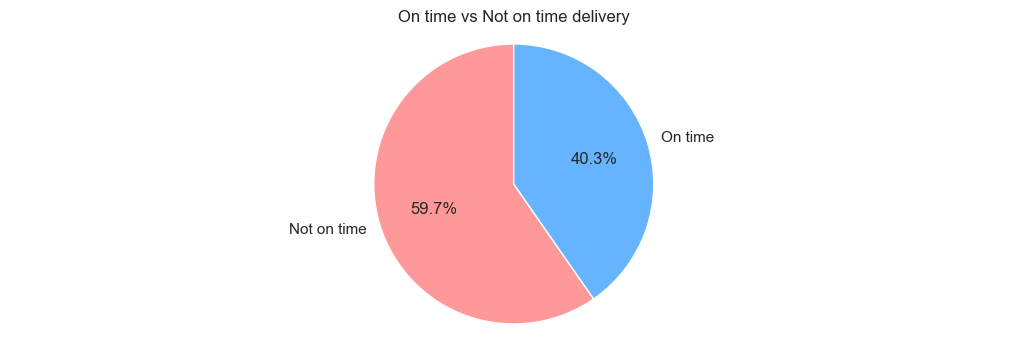

In [199]:
# Pie chart showing the value count on time or not on time delivery 
labels = 'Not on time', 'On time'
frequency = [6563, 4436]
fig1, ax1 = plt.subplots()
explode = (0, 0) 
colors = ['#ff9999','#66b3ff']
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('On time vs Not on time delivery')
plt.savefig('On time vs Not on time delivery.png', facecolor='w', dpi=300)
plt.show()

#Findings
# Findings that not on time has a higher % with 59.7 compared with on time

In [200]:
# value_count for gender reached_customer_care_calls
cust_care_call_count = value_count_columns('customer_care_calls')
cust_care_call_count.sort_values(by=['index'], axis = 0)

,index,customer_care_calls
4,2,636
1,3,3211
0,4,3569
2,5,2325
3,6,1012
5,7,246


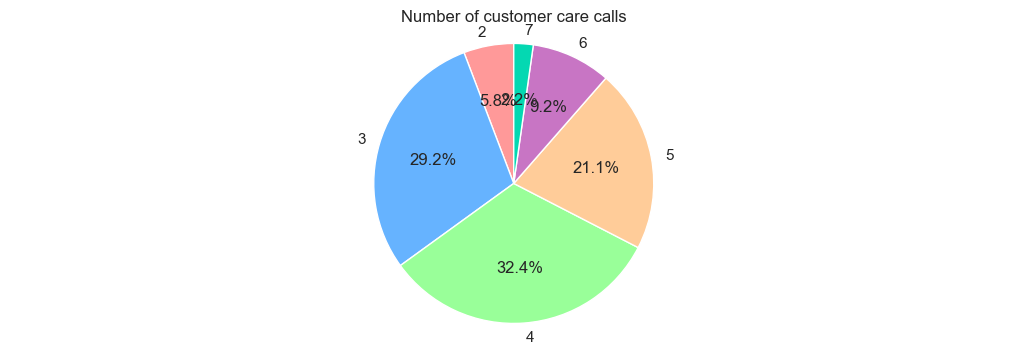

In [201]:
# Pie chart showing the value count on customer care calls
labels = '2', '3', '4', '5', '6', '7'
frequency = [636, 3211, 3569,2325, 1012, 246]
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0 , 0, 0)  
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#C875C4' ,'#04D8B2']
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90 , colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of customer care calls')
plt.savefig('Number of customer care calls.png', facecolor='w', dpi=300)
plt.show()

#Findings
# Customer calls has been made most often with 4 calls at 32%

In [202]:
#Cut cost of product and apply to diff bin
cost_prod__level = pd.cut(data['cost_of_the_product'], bins = 3, labels = ["min cost", "normal cost", "max cost"])
cost_prod__level.sample(5) 

id
3366       max cost
6061    normal cost
2097    normal cost
3649       max cost
4648       max cost
Name: cost_of_the_product, dtype: category
Categories (3, object): ['min cost' < 'normal cost' < 'max cost']

In [203]:
# value count cost of products
cost_prod__levelcount = cost_prod__level.value_counts()
cost_prod__levelcount

normal cost    4581
max cost       3803
min cost       2615
Name: cost_of_the_product, dtype: int64

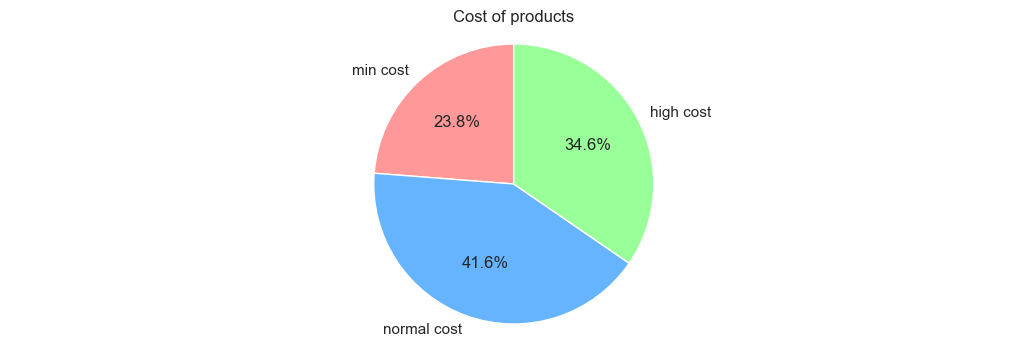

In [204]:
# Pie chart showing the range of  on cost_of_the_product
labels = 'min cost', 'normal cost', 'high cost'
frequency = [2615, 4581, 3803]
fig1, ax1 = plt.subplots()
explode = (0, 0, 0)  
colors = ['#ff9999','#66b3ff','#99ff99']
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Cost of products')
plt.savefig('cost_of_the_products.png', facecolor='w', dpi=300)
plt.show()

# Findings
# This has been placed with a bin of 3 from the range of of the cost of products with normal costing at the biggest range at 41%

In [205]:
data['customer_rating'].unique()

array([2, 5, 3, 1, 4], dtype=int64)

In [206]:
# value_count for customer rating
cust_rate_count = value_count_columns('customer_rating')
cust_rate_count.sort_values(by=['index'], axis = 0)

,index,customer_rating
1,1,2235
4,2,2165
0,3,2239
2,4,2189
3,5,2171


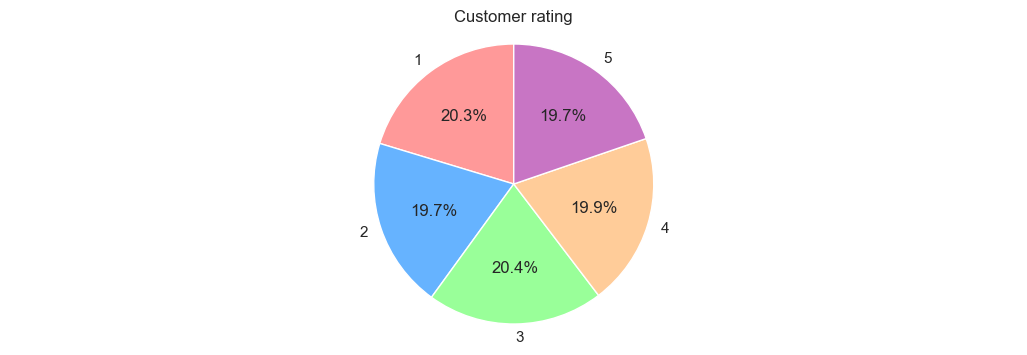

In [207]:
# Pie chart showing customer rating
labels = '1', '2', '3', '4', '5'
frequency = [2235, 2165, 2239,2189,2171]
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0) 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#C875C4']
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Customer rating')
plt.savefig('customer ratings.png', facecolor='w', dpi=300)
plt.show()

# Findings
# Customer rating is evenly spread out with 1 being the worst and 5 being the best

In [208]:
# value_count for customer rating
prior_p_count = value_count_columns('prior_purchases')
prior_p_count.sort_values(by=['index'], axis = 0)

,index,prior_purchases
1,2,2599
0,3,3955
2,4,2155
3,5,1287
4,6,561
6,7,136
7,8,128
5,10,178


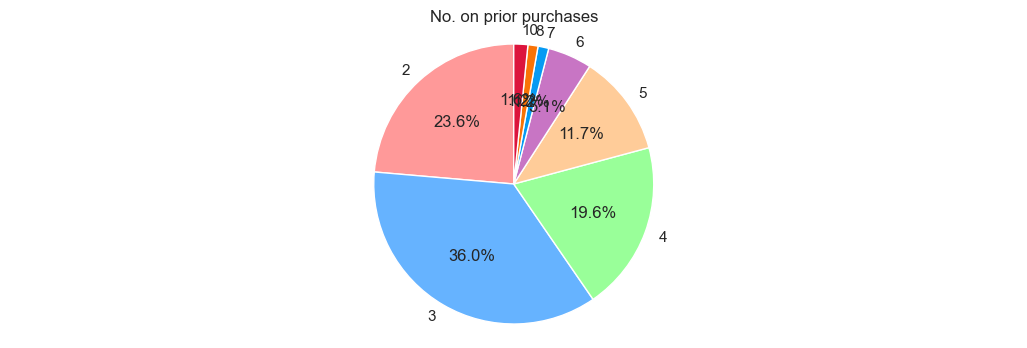

In [209]:
# Pie chart showing the range of  on prior purchases
labels = '2', '3', '4', '5', '6', '7', '8', '10'
frequency = [2599, 3955, 2155, 1287, 561, 136, 128, 178]
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0, 0, 0, 0)  
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#C875C4', '#069AF3', '#F97306', '#DC143C']
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('No. on prior purchases')
plt.savefig('No on prior purchases', facecolor='w', dpi=300)
plt.show()

# Findings
# 3 is the highest number of purchases from repeated customers at 36%

In [210]:
# discount offer unique items
data['discount_offered'].unique()

array([44, 59, 48, 10, 46, 12,  3, 11, 29, 32,  1, 43, 45,  6, 36, 18, 38,
       51,  2, 28, 24, 31, 61, 22,  4, 62, 16, 56, 15,  9, 40, 37, 41, 17,
       64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57,  7, 35,  8,  5, 53, 55,
       47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30],
      dtype=int64)

In [211]:
#Cut discount_offered and apply to diff bin
dis_offer_level = pd.cut(data['discount_offered'], bins = 3, labels = ["min discount", "normal discount", "max discount"])
dis_offer_level.sample(5) 

id
3862    min discount
9243    min discount
6296    min discount
9803    min discount
1798    min discount
Name: discount_offered, dtype: category
Categories (3, object): ['min discount' < 'normal discount' < 'max discount']

In [212]:
# value count discount offered
dis_offer__levelcount = dis_offer_level.value_counts()
dis_offer__levelcount

min discount       8946
max discount       1102
normal discount     951
Name: discount_offered, dtype: int64

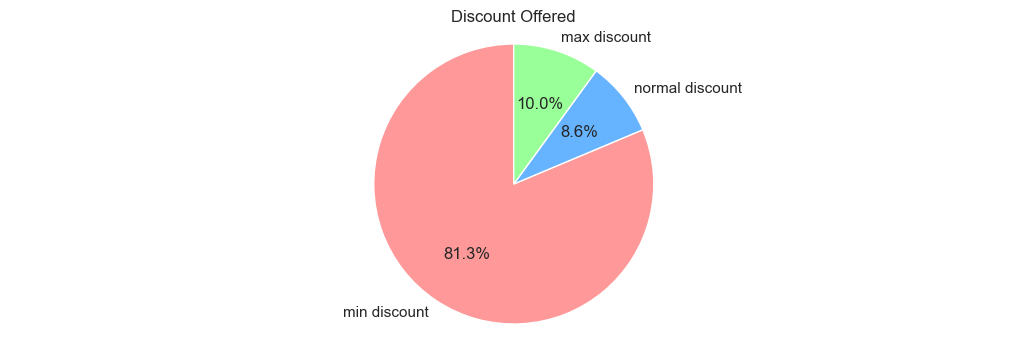

In [213]:
# Pie chart showing the range of discount offered
labels = 'min discount', 'normal discount', 'max discount'
frequency = [8946, 951, 1102]
fig1, ax1 = plt.subplots()
explode = (0, 0, 0)  
colors = ['#ff9999','#66b3ff','#99ff99']
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Discount Offered')
plt.savefig('Discounts offered', facecolor='w', dpi=300)
plt.show()

# Findings
# majority has been given to the least discount given with 81% 

In [214]:
# weight_in_gms offer unique items
data['weight_in_gms'].unique()

array([1233, 3088, 3374, ..., 1086, 1649, 1098], dtype=int64)

In [215]:
#Cut weight_in_gms and apply to diff bin
wt_level = pd.cut(data['weight_in_gms'], bins = 3, labels = ["light", "normal", "heavy"])
wt_level.sample(5) 

id
4469    normal
5905    normal
3545    normal
3024     light
7698    normal
Name: weight_in_gms, dtype: category
Categories (3, object): ['light' < 'normal' < 'heavy']

In [216]:
# value count weight
wt_levelcount = wt_level.value_counts()
wt_levelcount

normal    5339
light     4377
heavy     1283
Name: weight_in_gms, dtype: int64

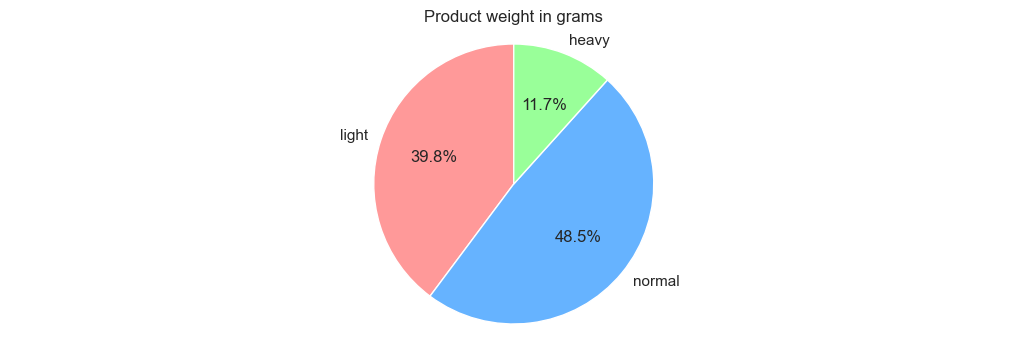

In [217]:
# Pie chart showing the range of  on weight
labels = 'light', 'normal', 'heavy'
frequency = [4377, 5339, 1283]
fig1, ax1 = plt.subplots()
explode = (0, 0, 0)  
colors = ['#ff9999','#66b3ff','#99ff99']
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Product weight in grams')
plt.savefig('Product weight in grams', facecolor='w', dpi=300)
plt.show()

# Findings
# Weight in gms has been bin with 3 and labelled with light, normal & heavy.
# Heavy product is with the lowest at 11%

### Comparing Variables

In [218]:
# Review data columns
data.columns

Index(['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached_on_time_y.n', 'gender_r', 'product_importance_r',
       'reached_on_time_y.n_r'],
      dtype='object')

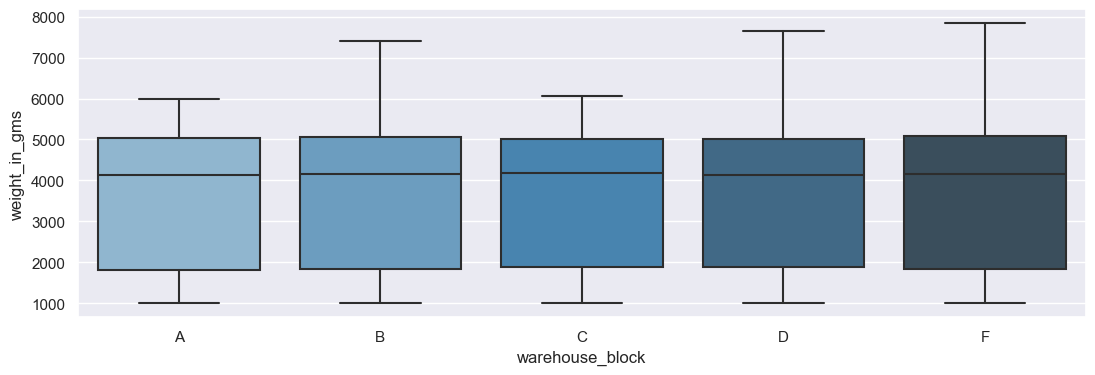

In [219]:
# Find the impact on Warehouse vs Weight
sns.boxplot(x = 'warehouse_block', y = 'weight_in_gms', data = data, order=['A', 'B', 'C', 'D', 'F'],  palette=("Blues_d"))
plt.savefig('Box plot reach on time vs weight', facecolor='w', dpi=300)
plt.show()
# Findings
# Block A & C have lesser in terms of weight.

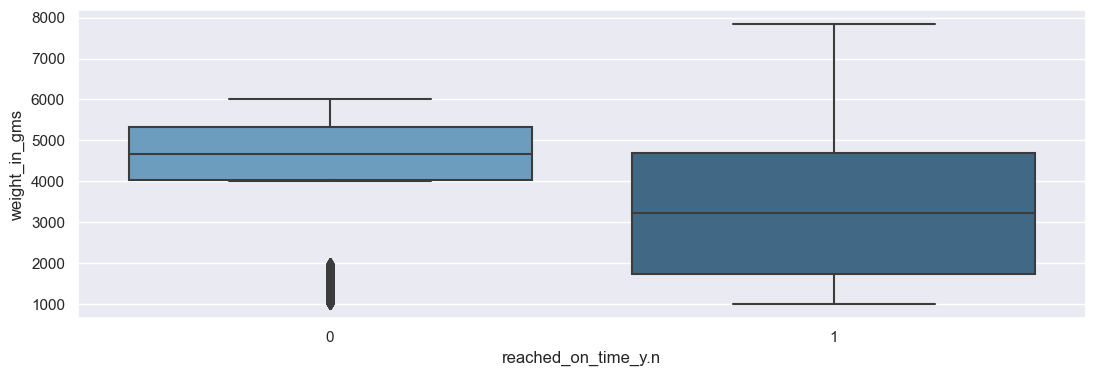

In [220]:
# Find the impact on reach on time vs weight in gms
sns.boxplot(x = 'reached_on_time_y.n', y = 'weight_in_gms', data = data, palette=("Blues_d"))
plt.savefig('Box plot reach on time vs weight', facecolor='w', dpi=300)
plt.show()
# Findings
#0 is reach on time, 1 is not reach on time
#This shows that the higher in weight, the higher chance that it will not reach in time 

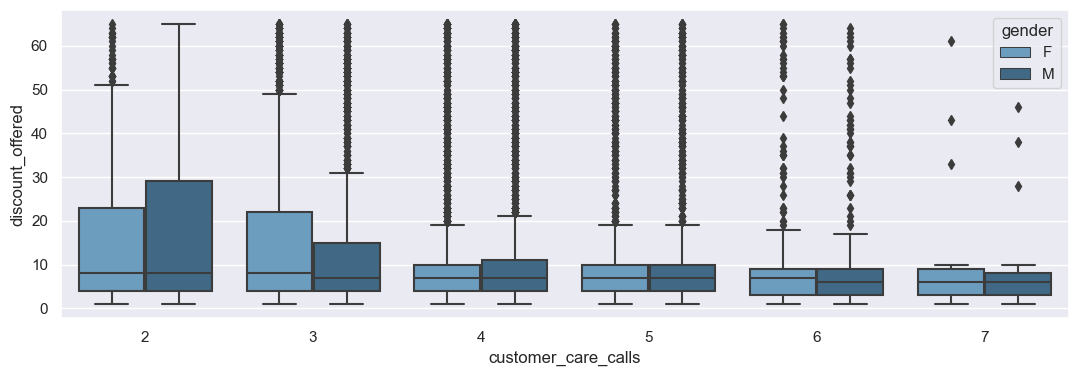

In [221]:
#Find Customer care calls impact on discount offered
sns.boxplot(x = 'customer_care_calls', y = 'discount_offered', data = data, hue = 'gender', palette=("Blues_d"))
plt.savefig('Box plot reach on time vs weight', facecolor='w', dpi=300)
plt.show()

# Findings
# The lesser the calls the batter it is. So for 2 calls it has the highest point for discount offered
# cannot make a decisison here
# Mean no diff
# Discount being offered highest for Male at 2 calls

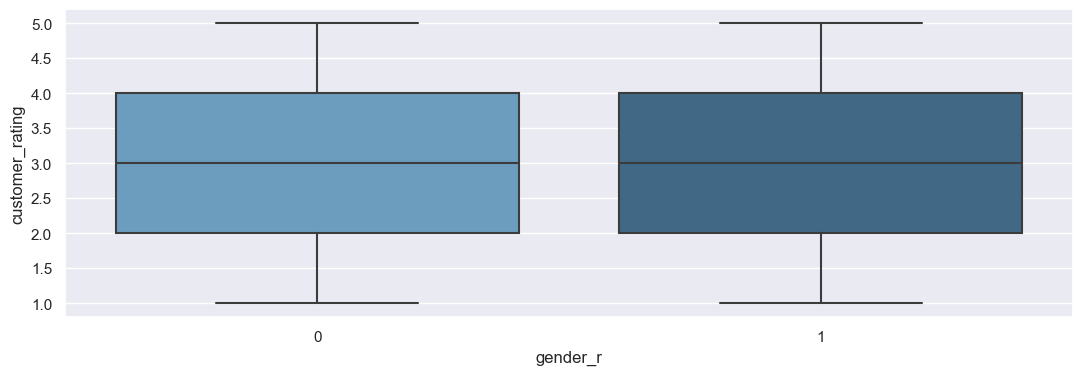

In [222]:
#Find Gender vs customer rating 
sns.boxplot(x = 'gender_r', y = 'customer_rating', data = data , palette=("Blues_d"))
plt.savefig('Box plot reach on time vs weight', facecolor='w', dpi=300)
plt.show()

# Findings
# This shows that there is no difference in impact for both gender under customer ratings

### Class specific columns

In [223]:
# Check which column has the many uniques values
data.nunique()

warehouse_block             5
mode_of_shipment            3
customer_care_calls         6
customer_rating             5
cost_of_the_product       215
prior_purchases             8
product_importance          3
gender                      2
discount_offered           65
weight_in_gms            4034
reached_on_time_y.n         2
gender_r                    2
product_importance_r        3
reached_on_time_y.n_r       2
dtype: int64

In [224]:
# Find quartiles in the cost_of_the_product
data['cost_of_the_product'].quantile([0.25,0.5,0.75,1]).round(2)

0.25    169.0
0.50    214.0
0.75    251.0
1.00    310.0
Name: cost_of_the_product, dtype: float64

In [225]:
#create cost class
def create_cost_class(x):
    if x > 251:
        cost_class = 'High Cost'
    elif x > 214 and x <= 250:
        cost_class = 'Avg Cost'
    else:
        cost_class = 'Low Cost'
    return cost_class

data['cost_class'] = data['cost_of_the_product'].apply(create_cost_class)
data['cost_class'] 

id
1         Low Cost
2         Avg Cost
3         Low Cost
4         Low Cost
5         Low Cost
           ...    
10995    High Cost
10996     Avg Cost
10997     Avg Cost
10998     Avg Cost
10999     Low Cost
Name: cost_class, Length: 10999, dtype: object

In [226]:
# Find quartiles in the discount_offered
data['discount_offered'].quantile([0.25,0.5,0.75,1]).round(2)

0.25     4.0
0.50     7.0
0.75    10.0
1.00    65.0
Name: discount_offered, dtype: float64

In [227]:
#create cdiscount class
def create_discount_class(x):
    if x > 10:
        discount_class = 'High Discount Offered'
    elif x > 7 and x <= 9:
        discount_class = 'Avg Discount Offered'
    else:
        discount_class = 'Low discount Offered'
    return discount_class

data['discount_class'] = data['discount_offered'].apply(create_discount_class)
data['discount_class']  

id
1        High Discount Offered
2        High Discount Offered
3        High Discount Offered
4         Low discount Offered
5        High Discount Offered
                 ...          
10995     Low discount Offered
10996     Low discount Offered
10997     Low discount Offered
10998     Low discount Offered
10999     Low discount Offered
Name: discount_class, Length: 10999, dtype: object

In [228]:
# Find quartiles in the weight_in_gms
data['weight_in_gms'].quantile([0.25,0.5,0.75,1]).round(2)

0.25    1839.5
0.50    4149.0
0.75    5050.0
1.00    7846.0
Name: weight_in_gms, dtype: float64

In [229]:
#create cost class
def create_wt_class(x):
    if x > 5050:
        wt_class = 'Heavy Weight'
    elif x > 4149 and x <= 5049:
        wt_class = 'Avg Weight'
    else:
        wt_class = 'Light Weight'
    return wt_class

data['wt_class'] = data['weight_in_gms'].apply(create_wt_class)
data['wt_class']  

id
1        Light Weight
2        Light Weight
3        Light Weight
4        Light Weight
5        Light Weight
             ...     
10995    Light Weight
10996    Light Weight
10997    Light Weight
10998    Light Weight
10999    Light Weight
Name: wt_class, Length: 10999, dtype: object

### Relationship between Features and Customer rating 5

In [230]:
data.columns

Index(['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached_on_time_y.n', 'gender_r', 'product_importance_r',
       'reached_on_time_y.n_r', 'cost_class', 'discount_class', 'wt_class'],
      dtype='object')

In [231]:
# Create new dataframe for customer rating 5

df6 = data[(data['customer_rating']==5)]
df6.head(1)

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y.n,gender_r,product_importance_r,reached_on_time_y.n_r,cost_class,discount_class,wt_class
id,,,,,,,,,,,,,,,,,
2,F,Flight,4,5,216,2,low,M,59,3088,1,0,1,no,Avg Cost,High Discount Offered,Light Weight


In [232]:
# Create function to compare 
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Customer_rating reach on time
    '''
    _agg = {
        'customer_care_calls': 'count'
    }
    _groupby = ['reached_on_time_y.n', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)

    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6), cmap="BuPu" )
    
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.title(feature)
    plt.xlabel('Reach on Time')
    plt.ylabel(feature)
    plt.xticks(np.arange(2), ('No', 'Yes'))  
    plt.show();

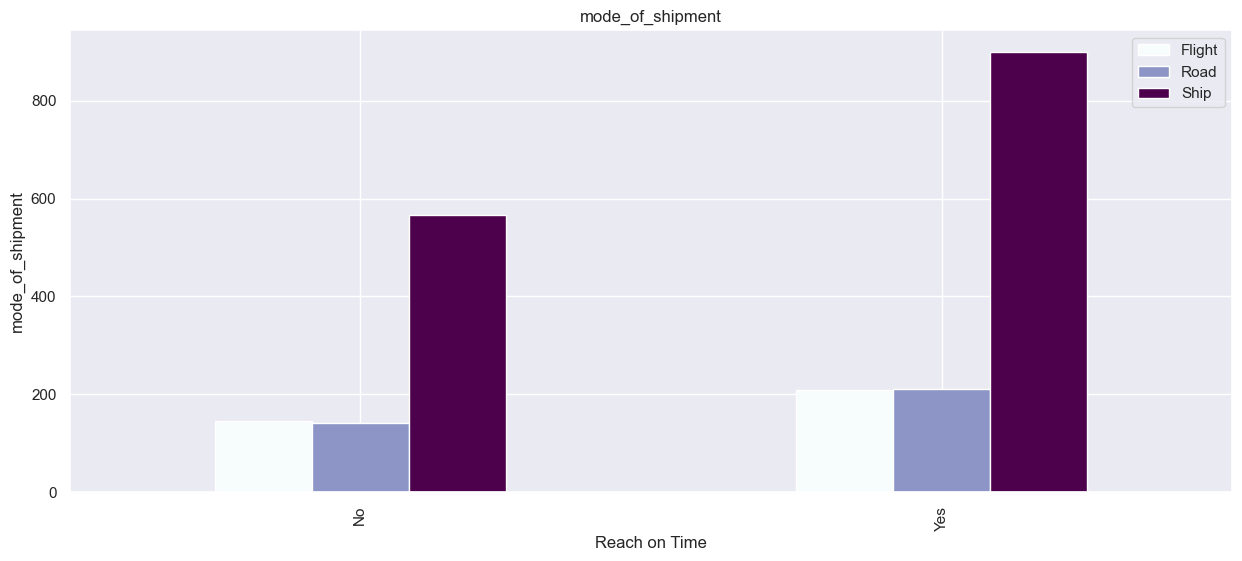

In [233]:
# Customer rating 5 vs mode of shipment
bar_charts(df6, 'mode_of_shipment')
plt.show()
# Shipping has the highest mode for customer reach on time

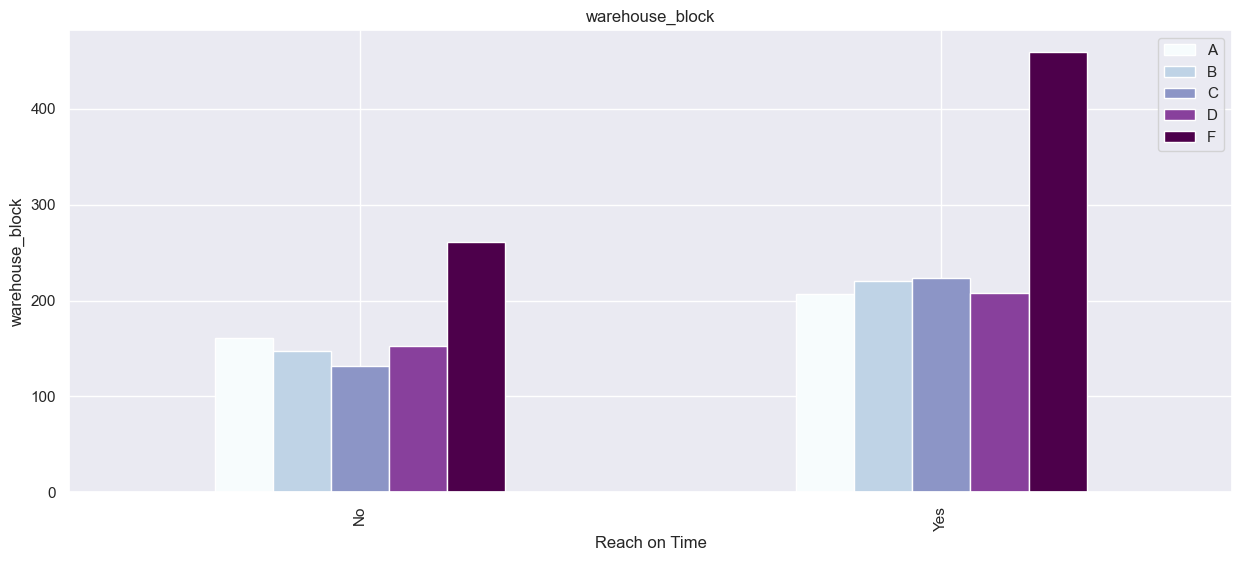

In [234]:
# Customer rating 5 vs warehouse block
bar_charts(df6, 'warehouse_block')
plt.show()
# Ware house F has the highest rating

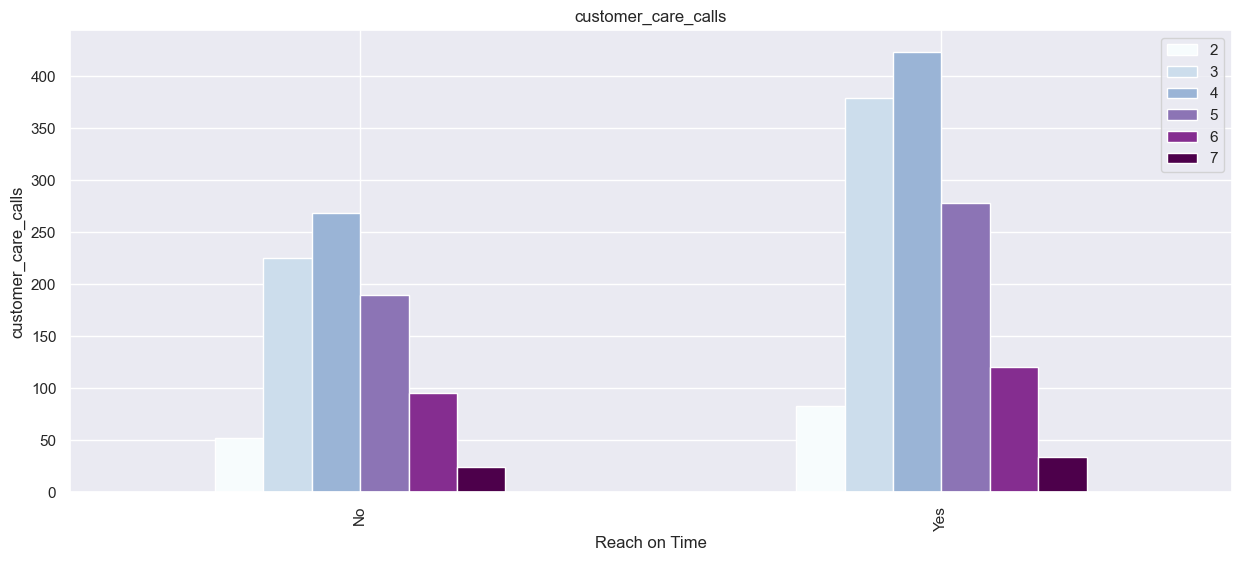

In [235]:
# Customer rating 5 vs customer care calls
bar_charts(df6, 'customer_care_calls')
plt.show()
# There is more customer calls on time target, showing that customer need to make calls more in order for shipment to reach on time 

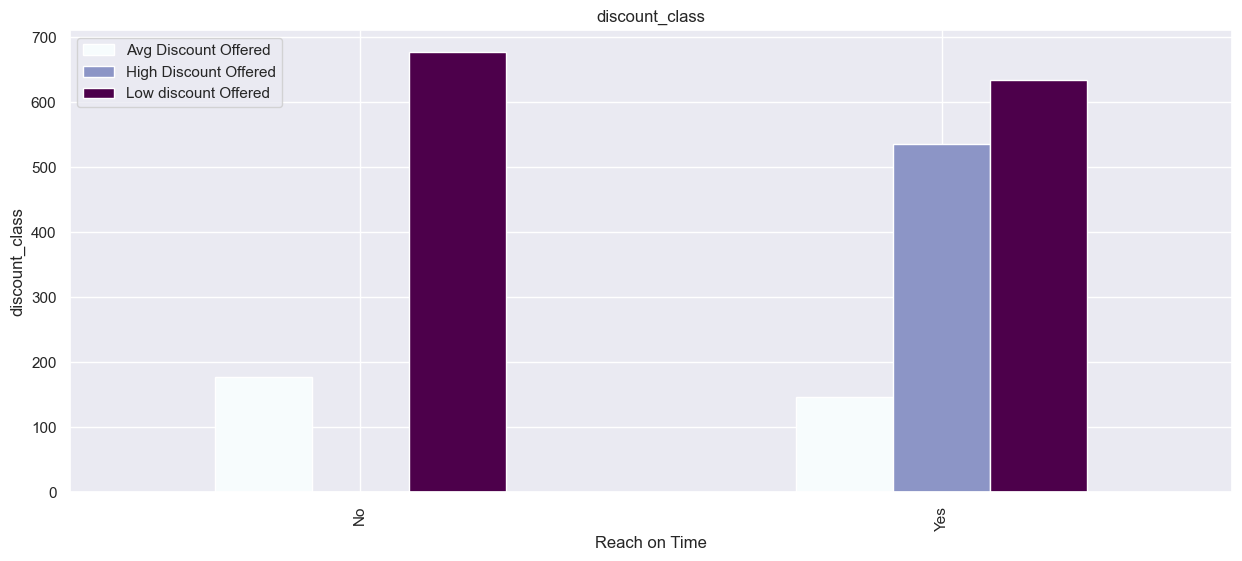

In [269]:
# Customer rating 5 vs discount
bar_charts(df6, 'discount_class')
plt.show()
# More discount offered

### Comparing data with only Warehouse F with customer rating 5

In [264]:
# Create new dataframe and catergorized to Ware house F

df2 = data[(data['warehouse_block']=='F')& (data['customer_rating']==5)]
df2

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y.n,gender_r,product_importance_r,reached_on_time_y.n_r,cost_class,discount_class,wt_class
id,,,,,,,,,,,,,,,,,
2,F,Flight,4,5,216,2,low,M,59,3088,1,0,1,no,Avg Cost,High Discount Offered,Light Weight
12,F,Flight,4,5,232,3,medium,F,32,3253,1,1,2,no,Avg Cost,High Discount Offered,Light Weight
18,F,Ship,5,5,227,3,medium,M,36,3952,1,0,2,no,Avg Cost,High Discount Offered,Light Weight
20,F,Ship,4,5,145,3,medium,M,45,1059,1,0,2,no,Low Cost,High Discount Offered,Light Weight
42,F,Ship,5,5,139,4,medium,M,61,1265,1,0,2,no,Low Cost,High Discount Offered,Light Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872,F,Ship,3,5,205,4,low,F,9,4819,1,1,1,no,Low Cost,Avg Discount Offered,Avg Weight
10890,F,Ship,5,5,243,2,medium,F,5,4709,0,1,2,yes,Avg Cost,Low discount Offered,Avg Weight
10904,F,Ship,3,5,241,4,low,F,9,5526,1,1,1,no,Avg Cost,Avg Discount Offered,Heavy Weight


In [265]:
# Creeate a functions to compare
def bar_charts1(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Warehouse F activity
    '''
    _agg = {
        'customer_care_calls': 'count'
    }
    _groupby = ['mode_of_shipment', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6), cmap="BuPu")
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.title(feature)
    plt.xlabel('mode_of_shipment')
    plt.ylabel(feature)
    plt.xticks(np.arange(3), ('Flight', 'Ship', 'Road'))  
    plt.show();

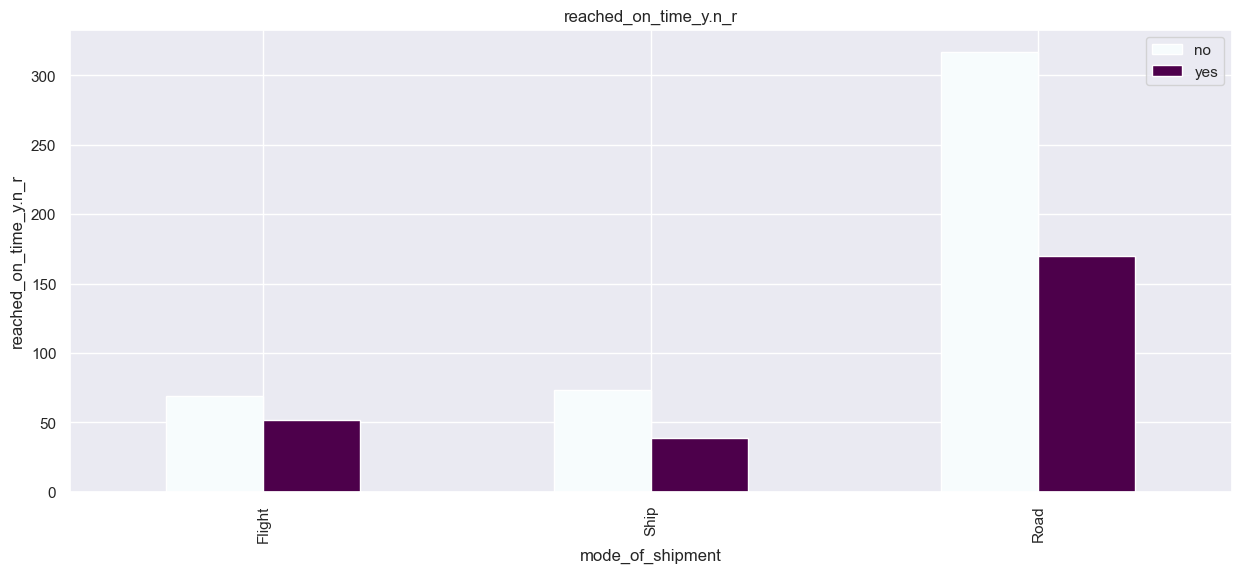

In [266]:
# Mode of shipment vs on time
bar_charts1(df2,'reached_on_time_y.n_r')
plt.show()
# Road has the more activity in warehouse F with higher chance on not reaching on time then on time

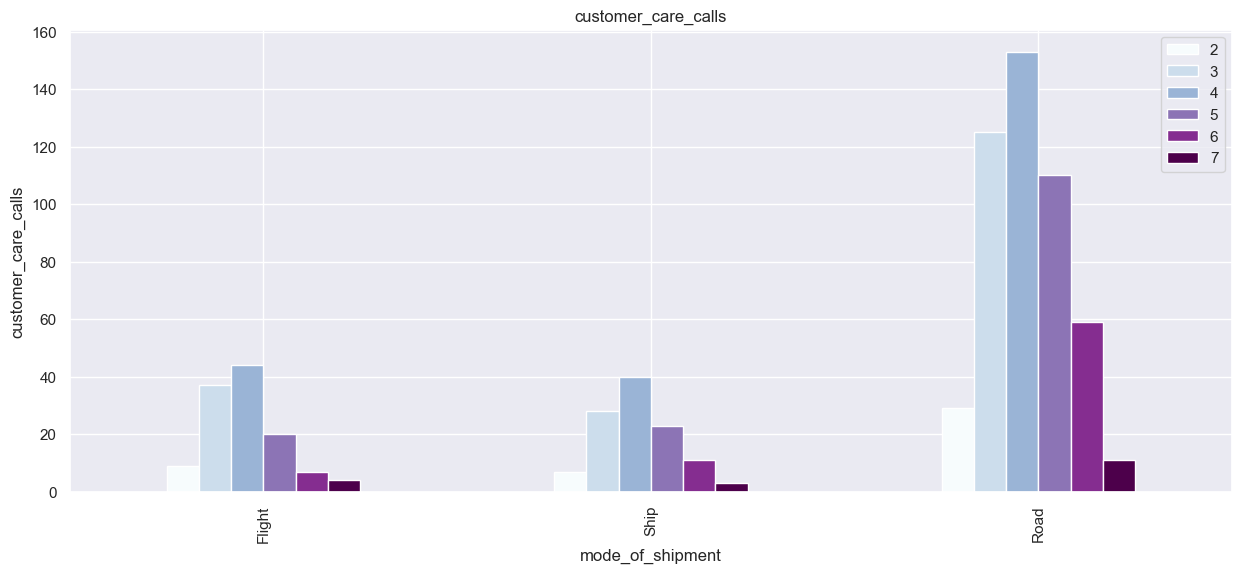

In [267]:
# Mode of customer calls vs shipment mode
bar_charts1(df2,'customer_care_calls')
plt.show()
# customer calls activity is more on road than on 

In [263]:
data.columns

Index(['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached_on_time_y.n', 'gender_r', 'product_importance_r',
       'reached_on_time_y.n_r', 'cost_class', 'discount_class', 'wt_class'],
      dtype='object')

### Comparing data with only customer rating 1

In [241]:
# Create new dataframe and catergorized to customer ratings 1

df3 = data[(data['customer_rating']==1)]
df3.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y.n,gender_r,product_importance_r,reached_on_time_y.n_r,cost_class,discount_class,wt_class
id,,,,,,,,,,,,,,,,,
6,F,Flight,3,1,162,3,medium,F,12,1417,1,1,2,no,Low Cost,High Discount Offered,Light Weight
8,F,Flight,4,1,233,2,low,F,48,2804,1,1,1,no,Avg Cost,High Discount Offered,Light Weight
22,B,Ship,3,1,232,4,medium,F,51,2899,1,1,2,no,Avg Cost,High Discount Offered,Light Weight
26,F,Ship,3,1,225,4,low,M,29,3496,1,0,1,no,Avg Cost,High Discount Offered,Light Weight
27,A,Ship,4,1,172,3,high,F,24,1066,1,1,3,no,Low Cost,High Discount Offered,Light Weight


In [242]:
def bar_charts3(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With customer rating 1
    '''
    _agg = {
        'customer_care_calls': 'count'
    }
    _groupby = ['reached_on_time_y.n_r', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6), cmap="BuPu")
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.title(feature)
    plt.xlabel('Reach on time')
    plt.ylabel(feature)
    plt.xticks(np.arange(2), ('yes', 'no'))  
    plt.show();

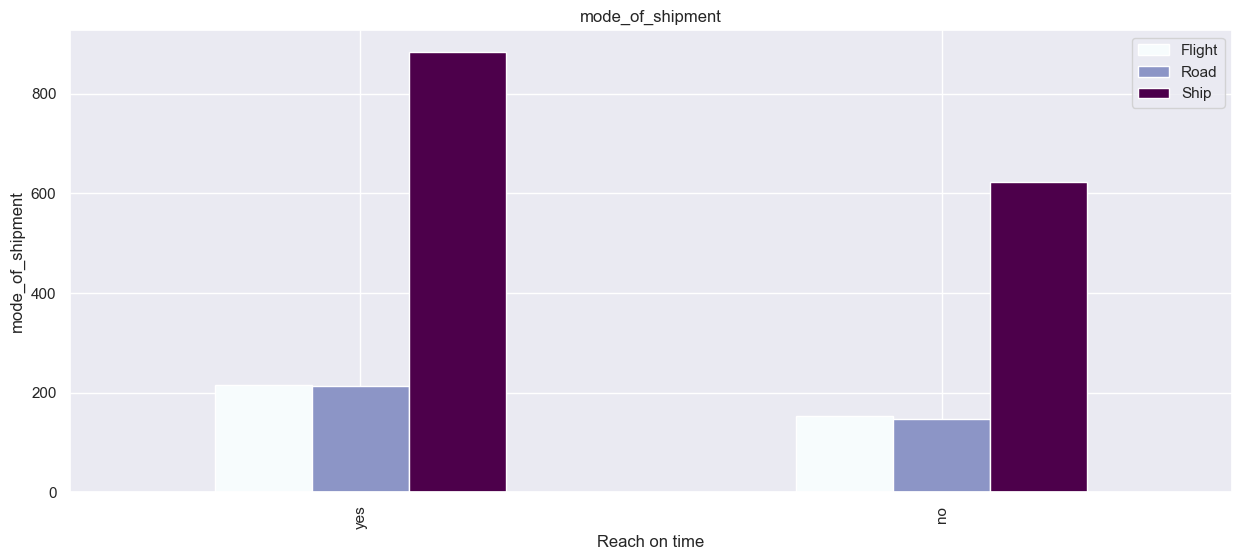

In [243]:
# Customer rating 1 vs mode of shipment
bar_charts3(df3, 'mode_of_shipment')

plt.show()

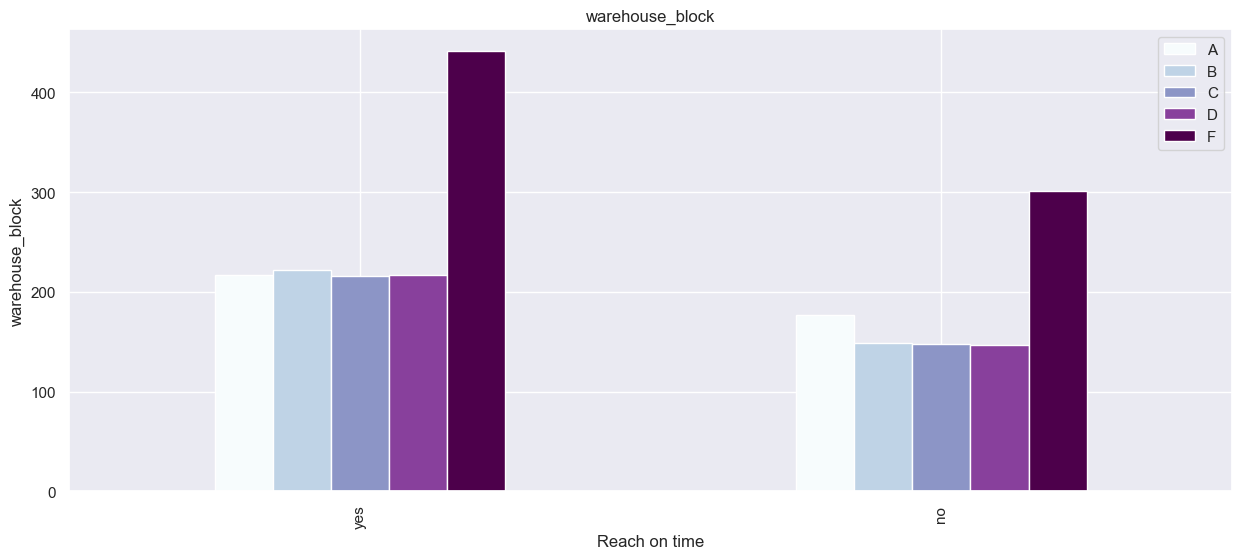

In [244]:
# Customer rating 1 vs mode of shipment
bar_charts3(df3, 'warehouse_block')
plt.show()

### Comparing data with only Customer rating 5 and care calls at 2

In [245]:
# Create new dataframe for customer rating 5

df7 = data[(data['customer_rating']==5) & (data['customer_care_calls']==2) ]
df7.head(1)

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y.n,gender_r,product_importance_r,reached_on_time_y.n_r,cost_class,discount_class,wt_class
id,,,,,,,,,,,,,,,,,
23,C,Ship,2,5,156,2,low,M,2,1750,1,0,1,no,Low Cost,Low discount Offered,Light Weight


In [246]:
# Create a function to compare
def bar_charts5(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With customer rating 5 and call care at 2
    '''
    _agg = {
        'customer_care_calls': 'count'
    }
    _groupby = ['reached_on_time_y.n_r', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6), cmap="BuPu")
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.title(feature)
    plt.xlabel('Reach on time')
    plt.ylabel(feature)
    plt.xticks(np.arange(2), ('no', 'yes'))  
    plt.show();

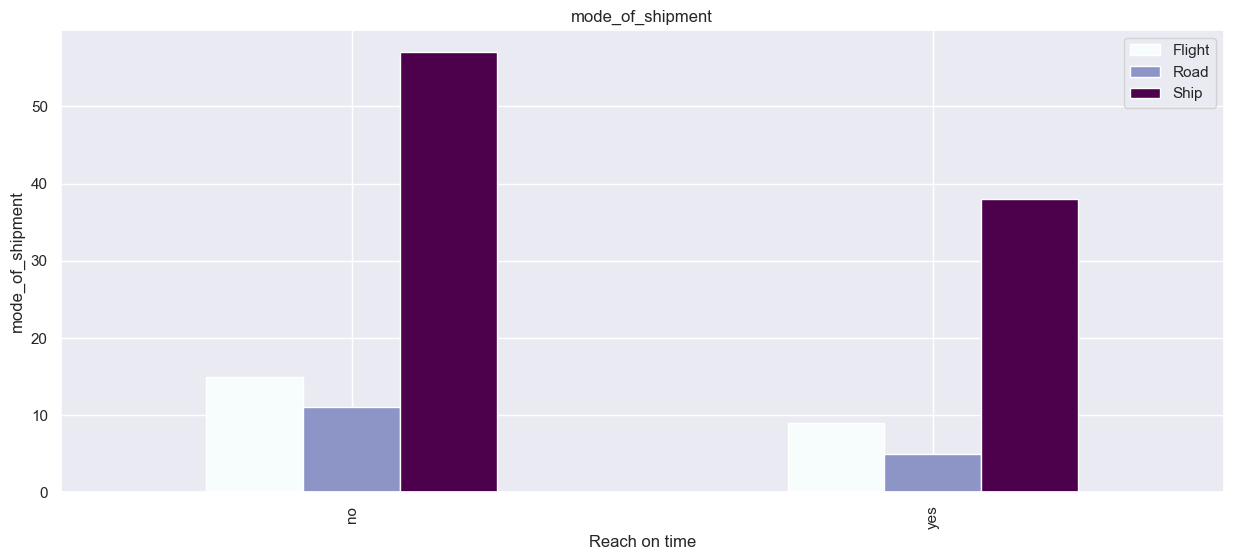

In [247]:
# customer calls at 2 and best customer rating at 5 vs mode of shipment
bar_charts5(df7, 'mode_of_shipment')

### To normalized data- Can be used for future actions

In [248]:
# Using min max
# optional to do this

dfx = data.copy()

dfx_num = dfx.select_dtypes(include='number')

dfx_norm = (dfx_num - dfx_num.mean()) / (dfx_num.max() - dfx_num.min())

dfx[dfx_norm.columns] = dfx_norm

dfx.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y.n,gender_r,product_importance_r,reached_on_time_y.n_r,cost_class,discount_class,wt_class
id,,,,,,,,,,,,,,,,,
1,D,Flight,-0.010983,-0.247636,-0.155125,-0.07095,low,F,0.478544,-0.350769,0.403309,0.495863,-0.3023,no,Low Cost,High Discount Offered,Light Weight
2,F,Flight,-0.010983,0.502364,0.027118,-0.19595,low,M,0.712919,-0.079769,0.403309,-0.504137,-0.3023,no,Avg Cost,High Discount Offered,Light Weight
3,A,Flight,-0.410983,-0.247636,-0.127088,0.05405,low,M,0.541044,-0.037986,0.403309,-0.504137,-0.3023,no,Low Cost,High Discount Offered,Light Weight
4,B,Flight,-0.210983,0.002364,-0.159798,0.05405,medium,M,-0.052706,-0.358951,0.403309,-0.504137,0.1977,no,Low Cost,Low discount Offered,Light Weight
5,C,Flight,-0.410983,-0.247636,-0.122415,-0.07095,medium,F,0.509794,-0.168008,0.403309,0.495863,0.1977,no,Low Cost,High Discount Offered,Light Weight


In [249]:
# Groupby reach on time with the mean of the columns
data_groupby_time = dfx.groupby(by=['reached_on_time_y.n']).agg({'customer_rating': 'mean', 
     'cost_of_the_product': 'mean',
     'customer_care_calls' : 'mean' ,
     'prior_purchases' : 'mean',
     'discount_offered': 'mean',
     'weight_in_gms': 'mean',
     'product_importance_r': 'mean'
    })
data_groupby_time.head()

,customer_rating,cost_of_the_product,customer_care_calls,prior_purchases,discount_offered,weight_in_gms,product_importance_r
reached_on_time_y.n,,,,,,,
-0.596691,-0.005639,0.020102,0.018548,0.012853,-0.122300,0.078108,-0.008004
0.403309,0.003811,-0.013587,-0.012537,-0.008688,0.082664,-0.052794,0.005410


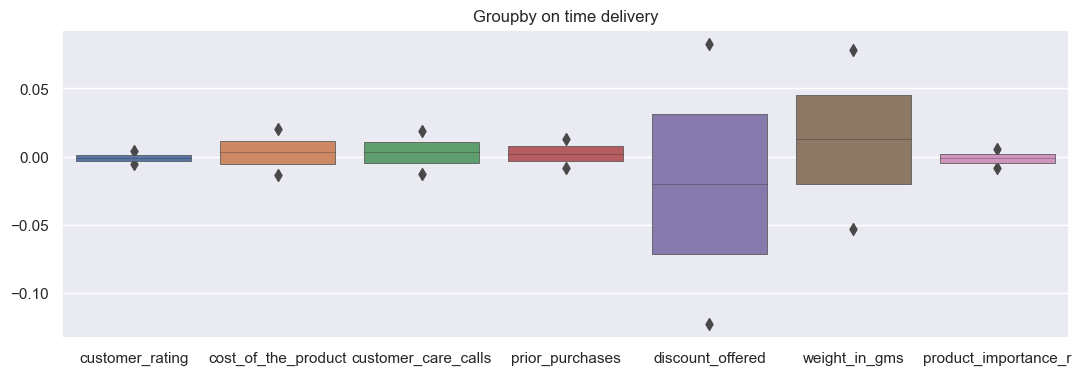

In [250]:
# Ploting of data by on time delivery column and by mean values
sns.set(rc = {'figure.figsize' : (13, 4), 
               'axes.labelsize' : 10 })
sns.set(style="darkgrid")
sns.boxenplot(data=data_groupby_time, linewidth=0.5).set_title('Groupby on time delivery')
plt.savefig('Groupby on time delivery', facecolor='w', dpi=300)
plt.show()

# Findings
# The higher the weight in grams shows the higher impact on the on time delivery